# Model Evaluation in Regression Models

To build a model to accuretly predict an unknown case, we have to perform regression evaluation after building the model.
- train and test on the same dataset
- train/test split

Regression Evaluation Metrics

## train and test on the same dataset


In [2]:
import pandas as pd
df = pd.read_csv("../data/FuelConsumption.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [4]:
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


We use entire dataset for training. For example, assume that we have 10 records in our dataset.
We select a small portion of the dataset, such as row numbers 6 to 9. (Independent variables)

The labels are called "Actual values" of the test set.

- high "traning accuracy"
    A high training accuracy isn't necessarily a good thing.
    Over-fit

- low "out-of-sample accuracy"

It's important that our models have high out-of-sample accuracy.

## train/test split

- Mutually exclusive
- More accurate evaluation on out-of-sample accuracy. Because the testing dataset is not part of the training dataset.
- It is more realistic for real-world problems.
- Train/test split is highly dependent on the datasets on which the data was trained and tested.
Another evaluation model to resolve most of these issues: K-Fold Cross-Validation

# Evaluation Metrics in Regression

## Mean Absolute Error (MAE)

In [7]:
import numpy as np

expected = [1.0] * 11

predicted = [round(1.0 - i * 0.1, 1) for i in range(11)]

In [8]:
print("real values:", expected)
print("predicted values:", predicted)

real values: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
predicted values: [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]


In [9]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(expected, predicted)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.5


In [14]:
errors = []
for i in range(len(expected)):
    error = abs(expected[i] - predicted[i])
    errors.append(error)
    print(f"{expected[i]} - {predicted[i]} - {error:.2f}")

1.0 - 1.0 - 0.00
1.0 - 0.9 - 0.10
1.0 - 0.8 - 0.20
1.0 - 0.7 - 0.30
1.0 - 0.6 - 0.40
1.0 - 0.5 - 0.50
1.0 - 0.4 - 0.60
1.0 - 0.3 - 0.70
1.0 - 0.2 - 0.80
1.0 - 0.1 - 0.90
1.0 - 0.0 - 1.00


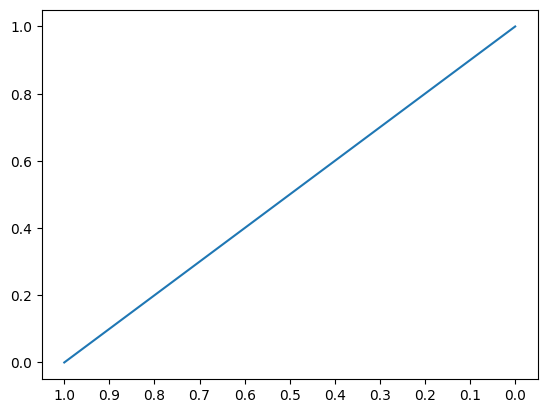

In [17]:
from matplotlib import pyplot
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.plot(errors)
pyplot.show()

## Mean Squared Error (MSE)

In [18]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(expected, predicted)
print("MSE:", mse)

MSE: 0.35000000000000003


In [19]:
errors = []
for i in range(len(expected)):
    error = (expected[i] - predicted[i])**2
    errors.append(error)
    print(f"{expected[i]} - {predicted[i]} - {error:.2f}")

1.0 - 1.0 - 0.00
1.0 - 0.9 - 0.01
1.0 - 0.8 - 0.04
1.0 - 0.7 - 0.09
1.0 - 0.6 - 0.16
1.0 - 0.5 - 0.25
1.0 - 0.4 - 0.36
1.0 - 0.3 - 0.49
1.0 - 0.2 - 0.64
1.0 - 0.1 - 0.81
1.0 - 0.0 - 1.00


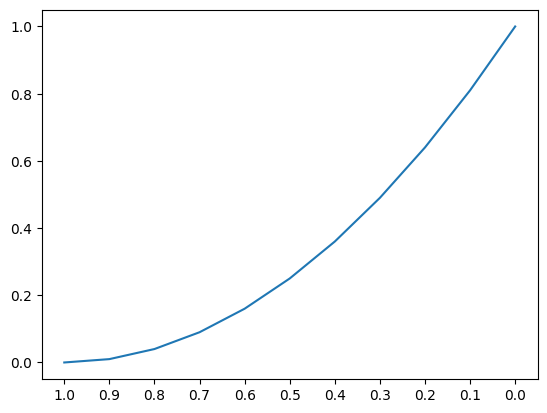

In [20]:
from matplotlib import pyplot
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.plot(errors)
pyplot.show()

## Root Mean Squared Error (RMSE)
RMSE is interpretable in the same units as the response.

In [21]:
rmse = np.sqrt(mean_squared_error(expected, predicted))
print("RMSE:", rmse)

RMSE: 0.5916079783099616


In [22]:
rmse = (mean_squared_error(expected, predicted, squared=False))
print("RMSE:", rmse)

RMSE: 0.5916079783099616


## Relative Absolute Error (RAE)
## Relative Squared Error (RSE)

## R-squared (r2) Score
The higher the r2 score, the better the model fits your data.

In [23]:
from sklearn.metrics import r2_score

r2 = r2_score(expected, predicted)
print("R-squared Score:", r2)

R-squared Score: 0.0


https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/